In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
import os 
path = os.listdir('C:/Users/Prajwal Kulkarni/MRI Scans/Training/')
classes = {'glioma_tumor':0, 'meningioma_tumor':1}

In [77]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [78]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/Prajwal Kulkarni/MRI Scans/Training/'+cls
    for k in os.listdir(pth):
        img = cv2.imread(pth+'/'+k, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [79]:
X = np.array(X)
Y = np.array(Y)

In [80]:
pd.Series(Y).value_counts()

0    826
1    822
dtype: int64

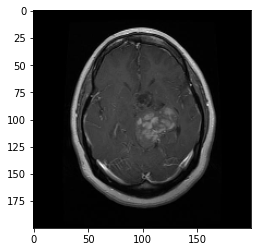

In [81]:
plt.imshow(X[0], cmap='gray');

In [82]:
X.shape

(1648, 200, 200)

In [83]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1648, 40000)

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state = 10, test_size =.20)

In [85]:
xtrain.shape, xtest.shape

((1318, 40000), (330, 40000))

In [86]:
# FEATURE SCALING

In [87]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [88]:
# FEATURE SELECTION: PCA

In [89]:
from sklearn.decomposition import PCA

In [90]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(1318, 40000) (330, 40000)


In [91]:
# TO TRAIN MODEL

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [112]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
import warnings
warnings.filterwarnings('ignore')

In [113]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [114]:
#EVALUATION

In [115]:
print("Training Score", lg.score(pca_train, ytrain))
print("Testing Score", lg.score(pca_test, ytest))

Training Score 0.9984825493171472
Testing Score 0.7696969696969697


In [116]:
print("Training Score", sv.score(pca_train, ytrain))
print("Testing Score", sv.score(pca_test, ytest))

Training Score 0.9476479514415781
Testing Score 0.8151515151515152


In [117]:
#PREDICTION

In [118]:
prediction = sv.predict(pca_test)
np.where(ytest!=prediction)

(array([  0,   1,   2,   3,   7,  28,  36,  37,  46,  55,  57,  62,  73,
         77,  91, 108, 111, 114, 117, 135, 143, 148, 149, 150, 151, 158,
        159, 161, 170, 176, 179, 184, 185, 187, 198, 200, 206, 208, 223,
        224, 234, 238, 253, 254, 256, 257, 261, 264, 266, 280, 281, 285,
        288, 289, 300, 301, 303, 307, 311, 320, 328], dtype=int64),)

In [119]:
prediction[1]

1

In [120]:
ytest[1]

0

In [121]:
# TESTING MODEL

In [122]:
dic = {0:'glioma_tumor', 1:'meningioma_tumor'}

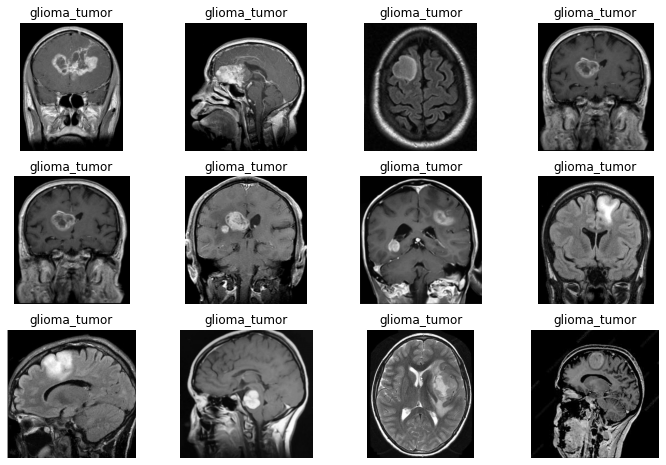

In [142]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Prajwal Kulkarni/MRI Scans/Testing/')
c = 1
for m in os.listdir('C:/Users/Prajwal Kulkarni/MRI Scans/Testing/glioma_tumor/')[:12]:
    plt.subplot(3,4,c)
    img = cv2.imread('C:/Users/Prajwal Kulkarni/MRI Scans/Testing/glioma_tumor/'+m,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title("glioma_tumor")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1